GDP and Life Expectancy: Exploring Potential Correlations Across Six Countries
--------------


Here are a few questions that this project will seek to answer:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [64]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Loading the Data

To look for connections between GDP and life expectancy, let's load the datasets into DataFrames so that they can be visualized.

Here all_data.csv will be read in into a DataFrame called df, followed by a quick inspection of the DataFrame using .head() and .shape to check its contents and dimensions.

In [9]:
df = pd.read_csv('all_data.csv')
print(df.head())
df.shape

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


(96, 4)

## Explore the Data

There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [10]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


**Let's rename a few of the columun names to make our lives easier:**

In [70]:
df = df.rename({"Country":"country"}, axis = "columns")
df = df.rename({"Year":"year"}, axis = "columns")
df = df.rename({"Life expectancy at birth (years)":"life_expect"}, axis = "columns")
df = df.rename({"GDP":"gdp"}, axis = "columns")
df['country'] = df['country'].replace('United States of America', 'USA')
df.head()

,country,year,life_expect,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploratory Plots

Let's explore the Distribution of Life Expectancy for each Country:

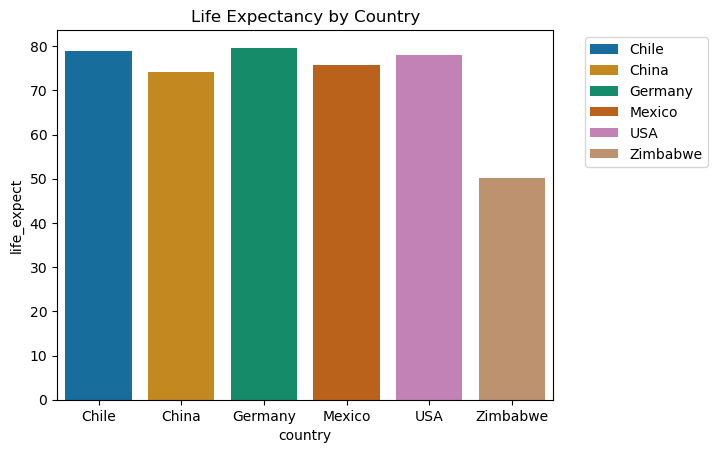

In [95]:
ax = sns.barplot(data=df, y='life_expect', x='country', hue='country', palette='colorblind', dodge=False, errorbar=None)
plt.title('Life Expectancy by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

Let's explore the Distribution of GDP for each Country:

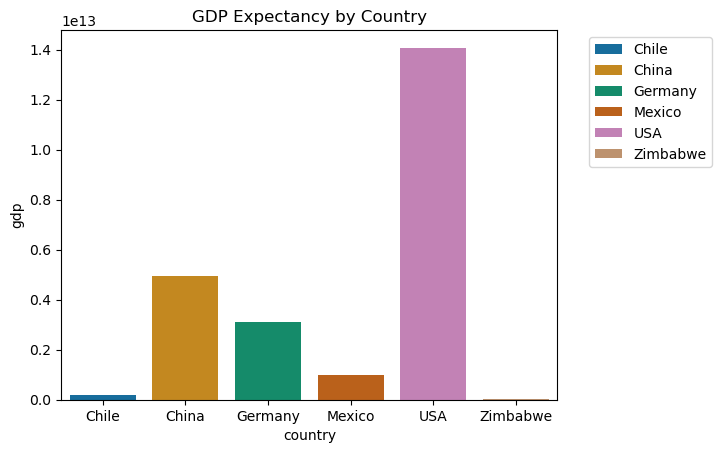

In [99]:
sns.barplot(data=df, y='gdp', x='country', hue='country', palette='colorblind', dodge=False, errorbar=None)
plt.title('GDP Expectancy by Country')

plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

### Line Charts
Let's see how the data for each country has changed over the years with the help of different line plots.

### GDP for each country over the years:

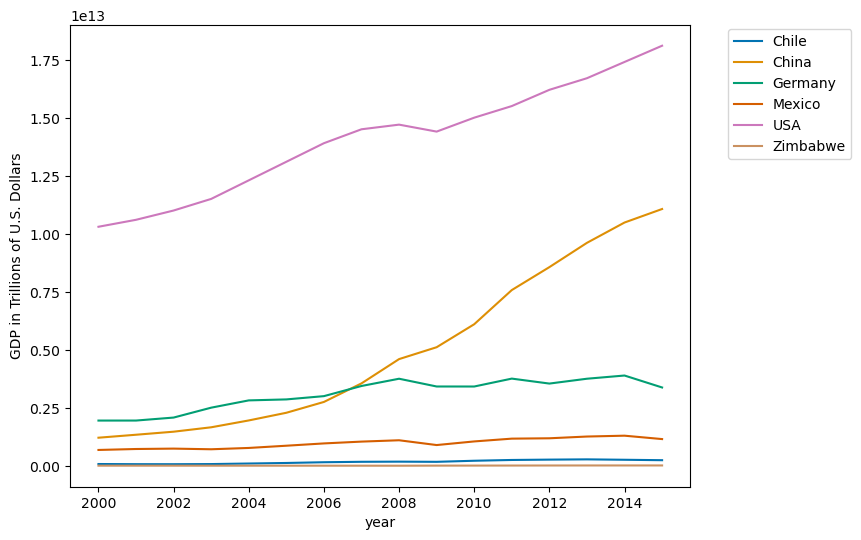

In [110]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.year, y=df.gdp, hue=df.country, palette='colorblind')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.85), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

#### Let's inspect each country on it's own.

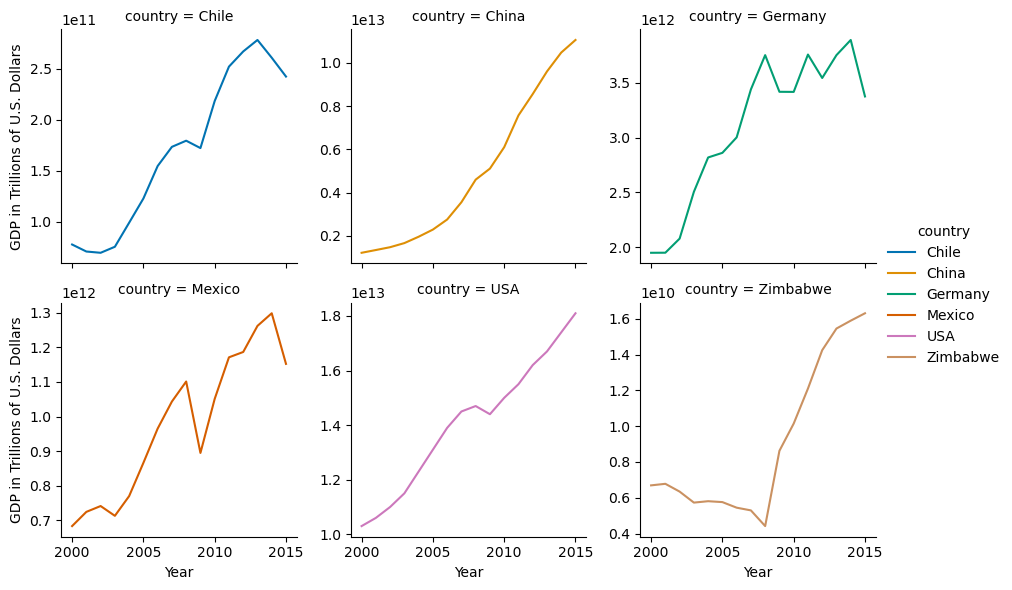

In [108]:
graphGDP = sns.FacetGrid(df, col="country", col_wrap=3, hue = "country", sharey = False, palette='colorblind')
graphGDP = (graphGDP.map(sns.lineplot,"year","gdp").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
graphGDP;

### Life expectancy for each country over the years:

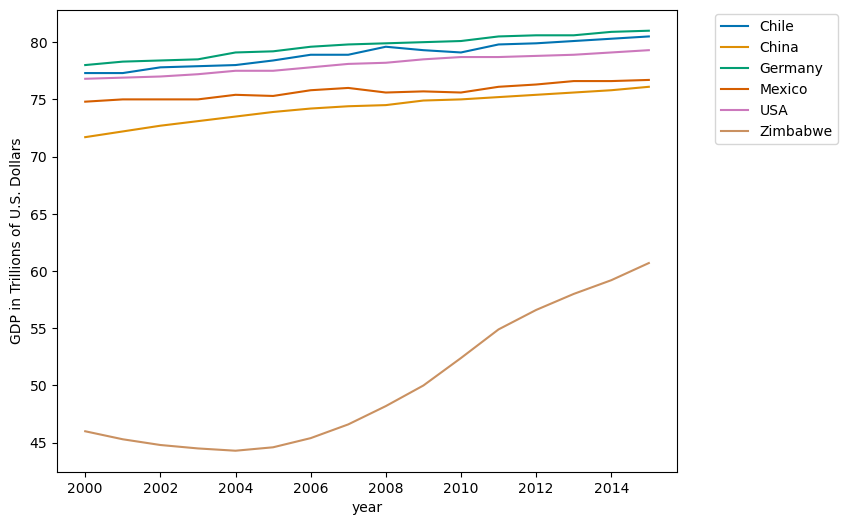

In [109]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.year, y=df.life_expect, hue=df.country, palette='colorblind')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.85), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

#### Let's inspect each country on it's own.

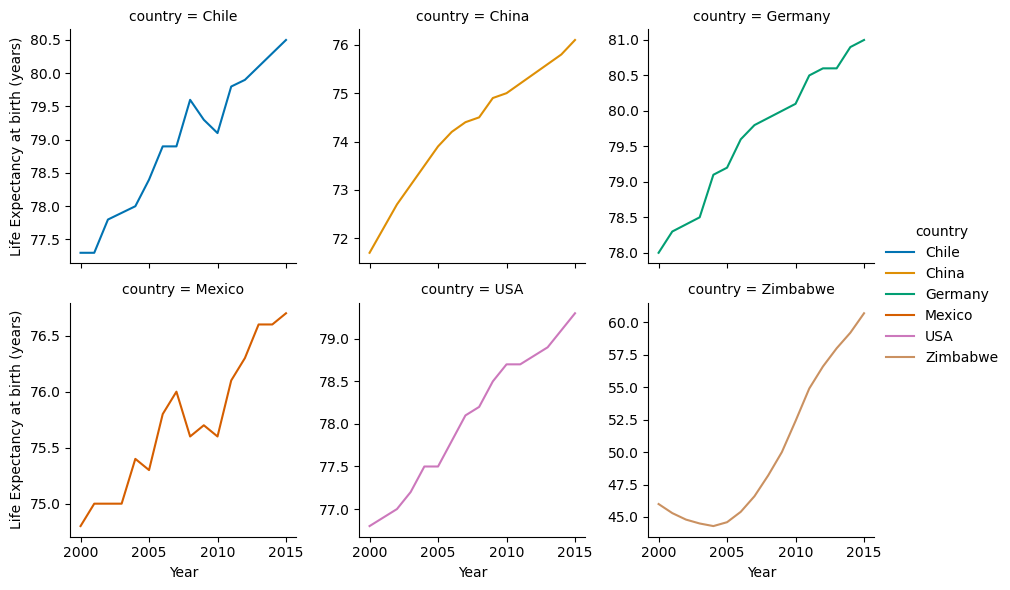

In [117]:
graph_life = sns.FacetGrid(df, col="country", col_wrap=3, hue = "country", sharey = False, palette='colorblind')
graph_life = (graph_life.map(sns.lineplot,"year","life_expect").add_legend().set_axis_labels("Year","Life Expectancy at birth (years)"))
graph_life;

### Scatter Plot

Now, let's create a scatter plot with life expectancy on the x-axis and GDP on the y-axis. Each point represents a specific country in a specific year. This can help us visually inspect whether there's any apparent correlation between GDP and life expectancy.

<Axes: xlabel='life_expect', ylabel='gdp'>

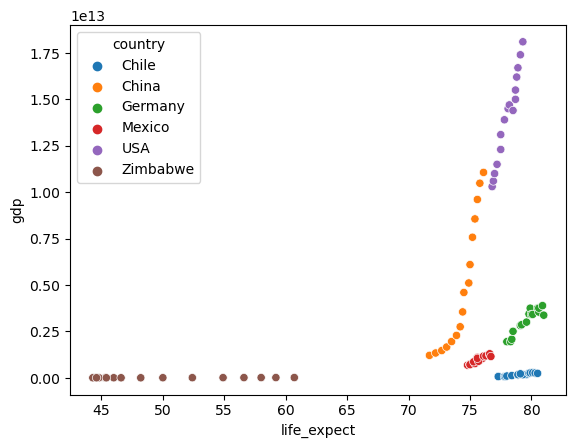

In [113]:
sns.scatterplot(data=df, x='life_expect', y='gdp', hue='country', palette = 'colorblind')

In general, we can see an increase in GDP and life expectancy, exhibiting a positive correlation.

Let's inspect this correlation for each country individually.

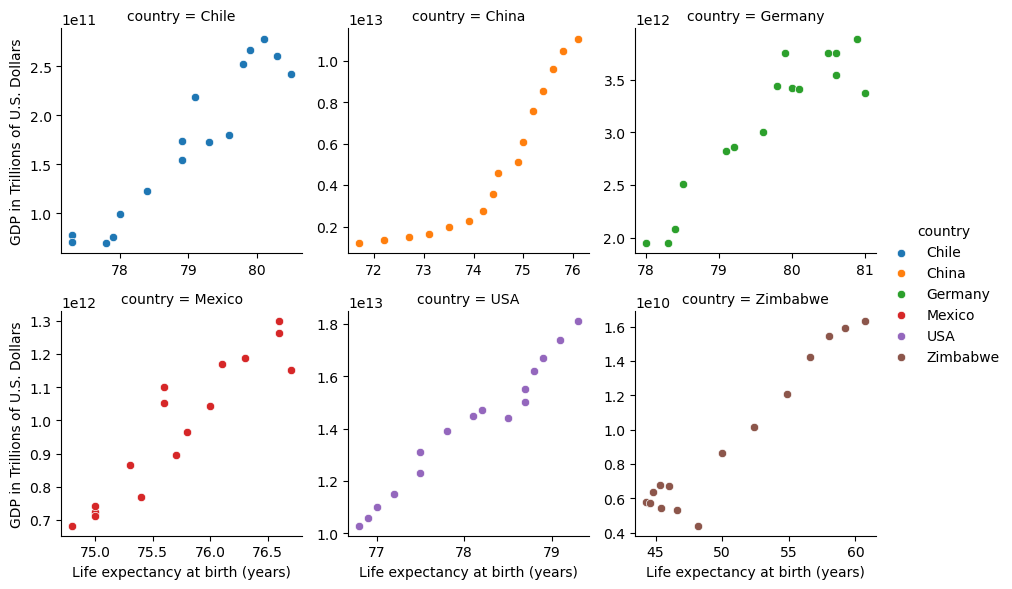

In [120]:
scatter = sns.FacetGrid(df, col="country", col_wrap=3, hue = "country", sharey = False, sharex = False)
scatter = (scatter.map(sns.scatterplot,"life_expect", "gdp").add_legend().set_axis_labels("Life expectancy at birth (years)","GDP in Trillions of U.S. Dollars"))

## Conclusions

This project unveiled compelling insights within the dataset, highlighting a significant positive correlation between a country's GDP and its life expectancy. The analysis revealed that, on average, life expectancy has been on the rise across the six nations over time. In parallel, GDP has exhibited a consistent upward trend, suggesting a potential link between economic prosperity and enhanced life expectancy.

To fortify this correlation, we utilized statistical measures, employing a scatter plot that visually encapsulates the positive association between GDP and life expectancy. This graphical representation serves as compelling evidence, emphasizing the intricate link between economic development and the overall well-being of a population.

In addition to validating the positive correlation, our analysis computed the average life expectancy for each nation, providing a snapshot of the prevailing health landscape. Furthermore, a meticulous examination of the distribution of life expectancy offered nuanced insights into variations and potential disparities within each nation.

In summary, this project not only validated a positive correlation between GDP and life expectancy but also provided a comprehensive overview of the temporal trends and distributional aspects of life expectancy in the studied nations.


To answer the last two questions more accuretly, we are going to add two more calculations:

- **Question:** What is the average life expectancy in these nations?
    - **Measure:** Calculate the mean of the life expectancy values for each country over the specified years.

- **Question:** What is the distribution of that life expectancy?
    - **Measure:** Examination of the variability and spread measures of life expectancy values for each nation. 


### Mean of the life expectancy values for each country over the specified years

In [121]:
average_life_expectancy = df.groupby('country')['life_expect'].mean()
print(average_life_expectancy)

country
Chile       78.94375
China       74.26250
Germany     79.65625
Mexico      75.71875
USA         78.06250
Zimbabwe    50.09375
Name: life_expect, dtype: float64


### Variability and spread measures of life expectancy values for each nation

In [123]:
spread_measures = df.groupby('country')['life_expect'].describe()
print(spread_measures)

          count      mean       std   min     25%    50%     75%   max
country                                                               
Chile      16.0  78.94375  1.058911  77.3  77.975  79.00  79.825  80.5
China      16.0  74.26250  1.318016  71.7  73.400  74.45  75.250  76.1
Germany    16.0  79.65625  0.975000  78.0  78.950  79.85  80.525  81.0
Mexico     16.0  75.71875  0.620987  74.8  75.225  75.65  76.150  76.7
USA        16.0  78.06250  0.832566  76.8  77.425  78.15  78.725  79.3
Zimbabwe   16.0  50.09375  5.940311  44.3  45.175  47.40  55.325  60.7
